### Notes on Preparing and Submitting this Assignment -- Please Read Carefully

* Your responses should be created in Python in a Jupyter Notebook.
You can put your solutions in this notebook or make a new notebook.
* **Use simulations to answer these questions.** Analytical solutions for some of the questions will be requested in Homework 2.
* Please submit **both your notebook and a PDF of the notebook** with your solutions. When you are all done, the best way to create a PDF is:
    1. Restart and rerun your notebook using the "Kernel->Restart & Run All" menu item.
    1. Save your notebook by clicking on the Save icon or using the "File->Save and Checkpoint" menu item.
    1. Generate a static HTML version of your notebook by using the "File->Print Preview" menu item. The static HTML version should open in a new tab or window.
    1. Generate a PDF of that version. You can follow this guide: [How to Save a Webpage as a PDF](https://www.digitaltrends.com/computing/how-to-save-a-webpage-as-a-pdf/)




In [1]:
# Some helpful imports -- feel free to import any other libraries you need!
import numpy as np
import numpy.random as npr
import random
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Some features of numpy that you may find useful:
**a.** If you add a scalar to a vector, that scalar gets added to every member of the vector:

In [2]:
x=npr.randint(2,size=10)
x

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [3]:
x+1

array([1, 1, 2, 1, 1, 2, 2, 1, 2, 1])

**b.** For a vector of boolean values, you can check whether they are all True using np.all(). Typically, this is used with a condition on a non-boolean vector

In [4]:
y=x+1

In [5]:
np.all(y<=1)

False

In [6]:
np.all(x<=1)

True

**c.** You can also check if any value satisfies a condition using np.any():

In [7]:
np.any(y==2)

True

In [8]:
np.any(x==2)

False

# Problems

## I. Simulations of fair experiments

**1.** Simulate rolling a fair die three times.  Let $E_i$ be the event that the total value rolled is equal to $i$. Find the relative frequencies of all of the events $E_3, E_4, \ldots, E_{18}$

a) Choose an appropriate number of experiments to simulate to make the simulated results useful for estimating the probabilities. What number of simulations did you choose? 

<span style="color:red">I chose the number of simuations to be 1,000,000 as the relative frequencies began to converge to 3 decimal points at this number and the histogram seemed to have converged from this number of simulations forward.</span>

In [9]:
def roll_three(i, num_sims=1000000):
    sides = range(1,7)
    events = []
    desired_event_count = 0
    for j in range(0, num_sims):
        event = random.choices(sides, k=3)
        event_sum = sum(event)
#         print('event sum =',event_sum)
        if event_sum == i:
#             print('Success!, event sum of',event_sum,'matches with desired event sum of',i)
            desired_event_count+=1
    
    return desired_event_count/num_sims

b) Print a table of all of the events $E_3, E_4, \ldots, E_{18}$ and their relative frequencies

In [10]:
rfreqs = []
num_sims = 1000000
print('Event\tRelative Frequency')
for i in range(3,19):
    rfreq=roll_three(i,num_sims)
    rfreqs.append(rfreq)
    print('E',i,'\t',rfreq,sep="",end="\n")

Event	Relative Frequency
E3	0.004672
E4	0.013776
E5	0.02781
E6	0.045929
E7	0.069356
E8	0.097211
E9	0.115363
E10	0.125301
E11	0.125402
E12	0.115771
E13	0.097523
E14	0.069502
E15	0.045951
E16	0.027833
E17	0.013897
E18	0.00465


c) Plot a histogram of the relative frequencies of the events $E_3, E_4, \ldots, E_{18}$

Text(0, 0.5, 'Counts')

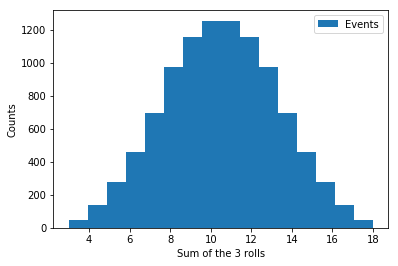

In [11]:
events= []
for i in range(16):
    num_events = int(rfreqs[i]*10000)
    for j in range(num_events):
        events+=[i+3]

plt.hist(x=events,bins=16,label="Events");
plt.legend();
plt.xlabel("Sum of the 3 rolls")
plt.ylabel("Counts")

**2.** When values are chosen at random over an interval such that all the parts of the interval are equally likely (we will clarify all this later), we say the values are uniformly distributed

The method ```npr.uniform()``` can be used to generate an arbitrary number of uniformly distributed real numbers in a specified interval. For instance, to generate 5 rows of 3 random  reals, each of which is chosen from the interval $[-2,2)$, we can do

In [12]:
npr.uniform(-2,3,size=(5,3))

array([[ 1.71887404,  1.66376096,  0.44987845],
       [ 2.95244842,  2.11899952,  1.46256648],
       [-0.60370182,  1.66039341,  0.30241233],
       [-1.63710121,  1.21253598,  2.06210554],
       [ 0.17839079,  2.1954707 ,  0.0957756 ]])

Use this information to build a simulation to calculate $\pi$. Draw pairs of random values, each of which is uniformly distributed on $[-1,1)$. Determine the number of pairs that lie within the unit circle. The relative frequency of the event "a pair lies within the unit circle" is related to pi. Explain the relation and show that you can accurately simulate $\pi$ to at least 3 decimal places using this technique

In [13]:
def calculate_pi(num_sims = 10000000):
    points = npr.uniform(-1,1,size=(num_sims,2))
    desired_outcome_count = 0
    for i in range(0,num_sims):
        point = points[i]
        inside_circle = math.sqrt(point[0]**2 + point[1]**2) <= 1
#         print('Is ',point,'inside of the circle?',inside_circle)
        desired_outcome_count += inside_circle
    
    return desired_outcome_count/num_sims*4

In [14]:
print('According to this Monte Carlo simulation, pi is ~',calculate_pi(),'.',sep="")

According to this Monte Carlo simulation, pi is ~3.1415212.


<span style="color:red">The relation between the relative frequency of the event "a pair lies within the unit circle" and pi, where each coordinate of the pair is between -1 inclusive and 1 noninclusive, is as follows.<br><br>Pi is found by multiplying this relative frequency by 4. This is because the unit circle has pi/4 the area of the 2x2 square that it is inscribed within. The possible points are randomnly distributed throughout this square, and thus you have pi/4 chance to draw a point within the unit circle out of the square.</span>

## Simulation and Hypothesis Testing

Review the notes and example on binary hypothesis testing from Lecture 4. In what follows, apply a $p$-value threshold of 0.01.  That is, there must be less than a 1% probability of seeing such an extreme value under the null hypothesis before we are willing to conclude that the null hypothesis is not reasonable.

In [15]:
def roll_dice(num_dice, times_to_roll, num_sims):
    die = range(1,7)
    sims = []
    for j in range(0,num_sims):
        rolls = []
        for i in range (0, times_to_roll):
            roll = random.choices(die,k=num_dice)
            rolls.append(roll)
        sims.append(rolls)
    return sims

def roll_under_four(num_sims=100000):
    sims = roll_dice(1,12,num_sims)
    count = 0
    for rolls in sims:
#         print(roll)
        if np.all(np.array(rolls) <= 4):
            count+=1
        
    return count/num_sims

def roll_pair_under_six(times_to_roll, num_sims=100000):
    sims = roll_dice(2,times_to_roll,num_sims)
    under_occurrences = []
    for rolls in sims:
        over_occurred = False
        for pair in rolls:
            if pair[0]+pair[1] > 6:
                over_occurred = True
                break
        under_occurrences.append(not over_occurred)
    return sum(under_occurrences)/num_sims

**3.** If a 6-sided die is rolled 12 times and all the values are <=4, should we feel confident that the dice is not fair (i.e., reject the null hypothesis with p=0.01)?

In [16]:
print('Yes, we should feel confident that the die is not fair and reject the null hypothesis with p=0.01 as the probability of this occuring in a fair die is ~',roll_under_four(),'.',sep="")

Yes, we should feel confident that the die is not fair and reject the null hypothesis with p=0.01 as the probability of this occuring in a fair die is ~0.00741.


#### **4.** If a pair of dice is rolled 4 times (i.e., each die is rolled 4 times) and the sum of the dice is always less than or equal to 6, should we feel confident that the dice are note fair?

In [17]:
print('No, we should not feel confident that the dice are unfair as the probability of this occuring in a real set of dice is ~',roll_pair_under_six(4),'. This is certainly a small percentage, but with my p=0.01 this is not enough to definitively say.',sep="")

No, we should not feel confident that the dice are unfair as the probability of this occuring in a real set of dice is ~0.02986. This is certainly a small percentage, but with my p=0.01 this is not enough to definitively say.


**5.** Repeat problem 4 if the pairs of dice are rolled 6 times instead of 4 times.

In [18]:
print('Yes, we should feel confident that the dice are unfair as the probability of this occuring in a real set of dice is ~',roll_pair_under_six(6),'. There is a very small percentage of this happening, and with my p=0.01 this is enough to definitively say.',sep="")

Yes, we should feel confident that the dice are unfair as the probability of this occuring in a real set of dice is ~0.00521. There is a very small percentage of this happening, and with my p=0.01 this is enough to definitively say.


## Simulation of Systems with Hidden State and Conditional Probabilities

**6.** A magician has in her pocket **two** fair coins and a two-headed coin. She chooses one at random and flips it. What is the probability that the result is heads?

Build a simulation to answer this

In [19]:
def flip_coins(times_to_flip, num_sims = 100000):
    coins = [['H','T'],['H','T'],['H','H']]
    heads_count = 0;
    coin_indexes = range(0,len(coins))
    outcomes = []
    for i in range(0, num_sims):
        coin = coins[random.choice(coin_indexes)]
    #     print(coin)
        outcomes.append(random.choices(coin, k=times_to_flip))
    return outcomes

In [20]:
num_sims = 100000
outcomes = flip_coins(times_to_flip=1,num_sims=num_sims)
head_count = outcomes.count(['H'])
print("The probability that a result is heads is ~",head_count/num_sims,".",sep="")

The probability that a result is heads is ~0.666.


**7.** A magician has in her pocket two fair coins and a two-headed coin. The magician withdraws a coin and flips it. If it comes up Heads, what is the probability that a second flip of that same coin will also be Heads?

In [21]:
outcomes = flip_coins(times_to_flip=2)
HH_count = outcomes.count(['H','H'])
HT_count = outcomes.count(['H','T'])
print("The probability that both results are heads is ~",HH_count/(HH_count+HT_count),".",sep="")

The probability that both results are heads is ~0.748782570910562.


**8.** A magician has in her pocket two fair coins and a two-headed coin. The magician withdraws a coin and flips it twice. If it comes up Heads both times, what is the probability that a third flip of that same coin will also be Heads?

In [22]:
outcomes = flip_coins(times_to_flip=3)
HHH_count = outcomes.count(['H','H','H'])
HHT_count = outcomes.count(['H','H','T'])
print("The probability that all three results are heads is ~",HHH_count/(HHH_count+HHT_count),".",sep="")

The probability that all three results are heads is ~0.8326449166916093.
